# SDSS Activity: Spectroscopic Identification and Redshift Determination

Today we will learn how to spectroscopically identify stars, galaxies, and quasars in the SDSS.  We will then use the locations of prominent emission and absorption lines to determine the redshifts of distant galaxies, quasars, and intergalactic gas clouds, and the surface temperatures of stars in our own Milky Way.

Before we begin, please check out the following links, which briefly summarize SDSS spectroscopy.

- http://www.sdss.org/dr14/spectro/
- http://www.sdss.org/dr14/spectro/spectro_basics/


In [1]:
# Import all libraries needed for this notebook, then apply some settings
import SciServer.CasJobs as CasJobs # query with CasJobs
import numpy as np                  # standard Python lib for math ops
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import astroML
from astroML.datasets import fetch_sdss_spectrum
from astropy.io import ascii
print('All libraries imported')
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

All libraries imported
Settings applied


## Spectral morphologies of stars, galaxies, and quasars:

The [SDSS Skyserver](http://skyserver.sdss.org/public/en/tools/chart/navi.aspx) provides a simple interface for exploring the images and spectra of objects in the SDSS.  

In order to get a quick feel for the spectroscopic properties of stars, take some time to navigate the Skyserver, starting at the following location:

RA = 178.91,  Dec = 35.0

Try selecting only objects with spectra, and use the EXPLORE feature to explore the images and spectra of the wide variety of objects in the field.  Consider the following:

- What are the defining characteristics of quasars (also referred to as quasi-stellar objects, QSOs), stars, and galaxies?
- How do the images of stars, galaxies, and quasars compare?
- How does the color of the object compare with the general shape of the object's spectrum?
- How do the spectra of stars, galaxies, and quasars compare?


## Fetching and plotting SDSS spectra

In the next section, we will download SDSS spectra to examine them more carefully.  We will use a built-in python package from a data-mining and machine-learning library for astronomy called [astroML](http://www.astroml.org/index.html).  In order to plot a single spectrum, you just need to provide the SDSS plate, fiber, and MJD.

A spectrum from SDSS-I/II will be one of 640 fibers on a plate. Let's start with a classic plate: 274.  Try picking a random fiber number on the plate and see what you find.

In [2]:
# http://www.astroml.org/user_guide/datasets.html#sdss-data

plate = 274
fiber = 102
mjd = 51913
spec = fetch_sdss_spectrum(plate=plate,fiber=fiber,mjd=mjd)



caching to /home/idies/astroML_data/SDSSspec/0274/spSpec-51913-0274-102.fit


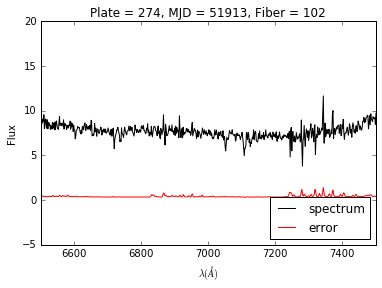

In [3]:
#------------------------------------------------------------
# Plot the resulting spectrum
#
# http://www.astroml.org/examples/datasets/plot_sdss_spectrum.html
#locals()['mjd']
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='r', label='error')

ax.legend(loc=4)

ax.set_title('Plate = {0:.0f}, MJD = {1:.0f}, Fiber = {2:.0f}'.format(locals()['plate'],locals()['mjd'],locals()['fiber']))

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
ax.axis([6500,7500, -5, 20])

plt.show()

## Determining the redshifts of objects

Prominent spectral emission lines can be used to determine the redshift of the object.  Below are some links to commonly observed transitions in galaxies and quasars.  

- http://classic.sdss.org/dr7/algorithms/linestable.html
- http://www.sdss.org/dr14/spectro/spectro_basics/#vacuum

Depending on their surface temperature, stars will exhibit a range of absorption lines as well:

- http://skyserver.sdss.org/public/en/proj/advanced/spectraltypes/lines.aspx#spectab


The wavelengths of the provided lines are given in Angstroms and measured in the rest (laboratory) frame.  The spectra you are examining may be distant quasars or galaxies.  If so, the lines will appear redshifted, according to the relation:

$\lambda_{observed} = \lambda_{rest}\times(1+z)$

where $z$ is the redshift of the object.



Try overplotting on your spectrum some of the most prominent lines.  If they don't appear to line up with prominent features in the spectrum, try redshifting your line markers until they appear to match the features in the spectrum.

The following links may be useful as you add text annotations or arrows to your plot:
- http://matplotlib.org/users/text_intro.html
- http://matplotlib.org/examples/pylab_examples/arrow_simple_demo.html

When you think you've correctly determined the redshift for your object, you can use the [SEARCH](http://skyserver.sdss.org/public/en/tools/explore/summary.aspx) function in the SkyServer to check your result against the SDSS determination. ([Here](http://www.sdss.org/dr14/algorithms/redshifts/) are some gory details about the SDSS spectroscopic pipeline, if you're interested.)

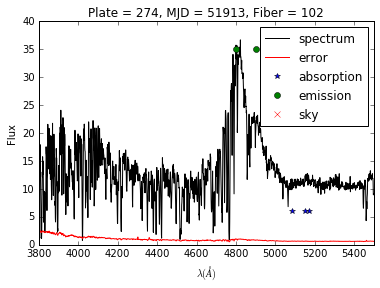

In [5]:
# Space here to replot your spectrum, this time with major emission lines labeled



sky_lines_y = [60., 60, 60, 60]
sky_lines_x = [5578.5,5894.6,6301.7,7246.0]

"""
### Galaxy Lines
abs_lines_y = []
abs_lines_x = np.array([3934.777,3969.588,4305.61,5176.7,5895.6,8500.36,8544.4,8664.52])
for m in range(0,len(abs_lines)):
    abs_lines_y.append(30.)

em_lines_y = []
em_lines_x = np.array([6549.86,6564.61,6585.27,6718.29,6732.67])
for m in range(0,len(em_lines_x)):
    em_lines_y.append(35.)
"""

### Quasar Lines
abs_lines_y = []
abs_lines_x = np.array([1215.7, 1241., 1398., 1548.2, 1550.8, 2796.4, 2803.5, 2383., 2344., 2374.])
for m in range(0,len(abs_lines_x)):
    abs_lines_y.append(6.)

em_lines_y = []
em_lines_x = np.array([1215.7, 1241., 1398., 1548.2, 2796.])
for m in range(0,len(em_lines_x)):
    em_lines_y.append(35.)

z_qso = 2.95
z_abs = 6069./2796.4 -1.
abs_lines_x_shifted = abs_lines_x*(1.+z_abs)
em_lines_x_shifted = em_lines_x*(1.+z_qso)

ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='r', label='error')
ax.plot(abs_lines_x_shifted, abs_lines_y, '*', label = 'absorption')
ax.plot(em_lines_x_shifted, em_lines_y, 'o', label = 'emission')
ax.plot(sky_lines_x, sky_lines_y, 'x', label = 'sky')

ax.legend(loc='upper right',numpoints=1)

ax.set_title('Plate = {0:.0f}, MJD = {1:.0f}, Fiber = {2:.0f}'.format(locals()['plate'],locals()['mjd'],locals()['fiber']))

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
ax.axis([3800,5500, 0, 40])

plt.show()

## If you think you have a quasar (a.k.a. QSO) spectrum...

You may be able look for patterns of "metal" absorption lines from galaxies or intergalactic gas intervening at lower redshift along the sightline to the quasar.  The following link below is an early publication of rest wavelengths for absorption lines typically observed in quasar spectra:

- http://articles.adsabs.harvard.edu//full/1979NASCP2111..215B/0000226.000.html

Can you make a template to mark the positions of these lines, and redshift them on your plot to match patterns of absorption lines in the quasar spectrum?  The following description of quasar spectra and features of foreground absorption may be useful:

- http://w.astro.berkeley.edu/~ay216/08/NOTES/Lecture26-08.pdf

<!--#<img src="Spectroscopy/QSOALS.png">-->

In [6]:
# Space here to replot your spectrum, this time with one or more absorption line systems labeled

## If you think you have a stellar spectrum...

Can you determine the approximate spectral classification of the star?
- http://skyserver.sdss.org/dr1/en/proj/advanced/spectraltypes/lines.asp#spectab
    

In [7]:
# Space here to replot your spectrum, this time with one or more absorption lines labeled

## Understanding the SDSS imaging

It's useful to understand how SDSS imaging data relates to the spectra for individual objects, since photometric (imaging) data (e.g., colors, magnitudes, and morphologies) were used to choose targets for spectroscopic follow-up.  The link below provides throughput curves for each of the 5 SDSS filters from the original imaging component of the survey:

http://classic.sdss.org/dr7/instruments/imager/index.html#filters

#### Can you try creating your own version of the filter throughput plot, using the files posted in the above link?

In [8]:
# Read in a filter file

u_data = ascii.read("sdss_filters/u.dat")  
print(u_data) 


u_wave = u_data['col1']
u_tp = u_data['col2']



col1  col2   col3   col4   col5 
---- ------ ------ ------ ------
2980    0.0    0.0    0.0 0.0727
3005 0.0001 0.0001 0.0014 0.0992
3030 0.0005 0.0005 0.0071 0.1308
3055 0.0013 0.0013 0.0127 0.1673
3080 0.0026 0.0026 0.0198 0.2075
3105 0.0052 0.0052 0.0314  0.247
3130 0.0093 0.0093 0.0464 0.2862
3155 0.0161 0.0161 0.0629 0.3444
3180  0.024  0.024 0.0794  0.392
3205 0.0323 0.0323 0.0949   0.43
 ...    ...    ...    ...    ...
3880 0.0413 0.0413 0.0634 0.7088
3905 0.0268 0.0268 0.0405 0.7158
3930 0.0145 0.0145 0.0216 0.7235
3955 0.0075 0.0075  0.011 0.7315
3980 0.0042 0.0042 0.0062 0.7393
4005 0.0022 0.0022 0.0032 0.7464
4030  0.001  0.001 0.0015 0.7526
4055 0.0006 0.0006 0.0008 0.7581
4080 0.0004 0.0004 0.0006 0.7631
4105 0.0002 0.0002 0.0003  0.768
4130    0.0    0.0    0.0 0.7727
Length = 47 rows


### Now, can you try converting the spectrum of a star or quasar into its relative filter magnitudes?

You may need information from the following page, on converting fluxes to magnitudes, and vice versa:
- http://www.sdss.org/dr14/algorithms/fluxcal/#SDSStoflux


Do your results agree with the [fiber magnitudes](http://www.sdss.org/dr14/algorithms/magnitudes/) for your object, which you can find in SkyServer?

## Quasar spectra, across cosmic time

Due to their exceptional luminosities, quasars can be seen beyond z=6.  Try exploring how the features of quasar spectra appear to change, as you move through a large range in redshift.  

- Do their emission properties change?  
- What do you notice about their absorption properties?  

In [9]:
## If you want, you can use a query to fetch quasars only
query="""
SELECT TOP 10 specObjID, z, survey, plate, fiberID, mjd
FROM SpecObj
WHERE class = 'QSO' AND zWarning = 0 AND z>2 
"""
# send query to CasJobs
qsos = CasJobs.executeQuery(query, "dr14")
qsos


,specObjID,z,survey,plate,fiberID,mjd
0,318796557392570368,2.070375,sdss,283,607,51959
1,329952197838137344,2.033383,sdss,293,231,51689
2,329977486605576192,2.382667,sdss,293,323,51689
3,329998652204410880,2.691162,sdss,293,400,51689
4,330000026593945600,2.124565,sdss,293,405,51689
5,313065077165025280,2.020725,sdss,278,236,51900
6,313160734676641792,4.036767,sdss,278,584,51900
7,329917288343955456,3.622447,sdss,293,104,51689
8,329920861756745728,2.077560,sdss,293,117,51689
9,331121808315017216,3.648712,sdss,294,390,51986


#### Download some photometric data (u,g,r,i,z magnitudes) for stars and quasars.  

- Do they overlap in color-space?
- How do they compare for quasars of different redshifts?
- Are there certain redshift ranges where quasars stand out more from the "stellar locus"?